## Creating a graph from text data
Looking at the neighbours of a selected word

### Loading the text data

In [1]:
import pandas as pd
import itertools

In [2]:
graph_data_path = '/home/benjamin/Documents/memetracker/Data/graph/'
pickle_data_path = '/home/benjamin/Documents/memetracker/Data/pickle/'
series_name = 'marseille'
pickle_file = pickle_data_path+series_name+'_texts'+'.pkl'
vocab_file = pickle_data_path+series_name+'_vocab_bow'+'.pkl'
tfidf_file = pickle_data_path+series_name+'_vocab_tfidf'+'.pkl'

In [3]:
text_data = pd.read_pickle(pickle_file)
vocab_data = pd.read_pickle(vocab_file)
tfidf_data = pd.read_pickle(tfidf_file)

In [4]:
# create the set of most used words
#nb_words = 200
#word_set = set(tfidf_data.words[0:nb_words])

### Creating the graph

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
G = nx.DiGraph()

In [11]:
G.add_node('test')

In [17]:
list(G.degree(['test','derd']).values())

[0]

In [20]:
G.degree('tessdst')

{}

In [ ]:
G.degree()

In [16]:
G.degree(['testdede']).values()

dict_values([])

In [21]:
def control_graph(G,word1,word2,list_forbidden_words):
    words = [word1,word2]
    
    # control the degree
    degrees = list(G.degree(words).values()) # if the node is not in the graph, return an empty list
    for word in words:
        if G.has_node(word):
            degree = G.degree(word)
            if degree > 50:
                list_forbidden_words.append(word)
                G.remove_node(word)
        
    # Check if in the list of forbidden words
    if (set(words)&set(list_forbidden_words)):
        forbidden_word = True
    else:
        forbidden_word = False
    return forbidden_word,list_forbidden_words

In [27]:
# for each text, create node for each keyword and connect to its following word 
list_forbidden_words = []
for text in text_data.filtered_text:
    textlist = str(text).split()
    for idx,word in enumerate(textlist):
        #print(idx)
        if (idx+1)<len(textlist):
            next_word = textlist[idx+1]
            # Firs control if the words follow the grap construction rules
            forbidden_word, list_forbidden_words = control_graph(G,word,next_word,list_forbidden_words)
            if  not forbidden_word:
                # Adding the nodes
                if not G.has_node(word):
                    G.add_node(word,name=word)
                if not G.has_node(next_word):
                    G.add_node(next_word,name=next_word)
                # Adding an edge
                if G.has_edge(word,next_word):
                    # we added this one before, just increase the weight by one
                    G[word][next_word]['weight'] += 1
                else:
                    # new edge. add with weight=1
                    G.add_edge(word, next_word, weight=1)


In [29]:
len(list_forbidden_words)

1260

In [30]:
G.size()

167214

In [43]:
# Reduce the graph if the node weighted degree is too small
for u in G.nodes():
    if G.degree(u,weight='weight')<10:
        G.remove_node(u)

In [ ]:
# Sparsify the graph if the weights are too small
average_weight = np.mean(weights)/np.max(weights)
for u,v,a in G.edges(data=True):
    if a['weight']<average_weight*5:
        G.remove_edge(u,v)

In [44]:
G.size()

31060

In [31]:
# Write the graph to a json file
from networkx.readwrite import json_graph
datag = json_graph.node_link_data(G)
import json
s = json.dumps(datag)
datag['links'] = [
        {
            'source': datag['nodes'][link['source']]['id'],
            'target': datag['nodes'][link['target']]['id'],
            'weight': link['weight']
        }
        for link in datag['links']]
s = json.dumps(datag)
with open("viz/graphM.json", "w") as f:
    f.write(s)

In [47]:
import matplotlib.pyplot as plt

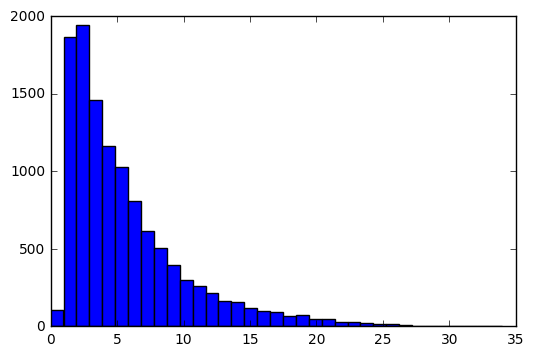

In [75]:
#degreeDic = G.degree(weight='weight')
degreeDic = G.degree()
degreeslist = list(degreeDic.values())
plt.hist(degreeslist,bins=35)
plt.show()

In [76]:
DF = pd.DataFrame.from_dict(degreeDic,orient='index')
DF.columns = ['Degree']

In [77]:
DF.sort_values(by='Degree', axis=0, ascending=False)

,Degree
Aix,34
ici.,30
Vaucluse,30
auront,29
exemple,29
h,29
trouver,28
longue,28
l'épisode,28
OM,28


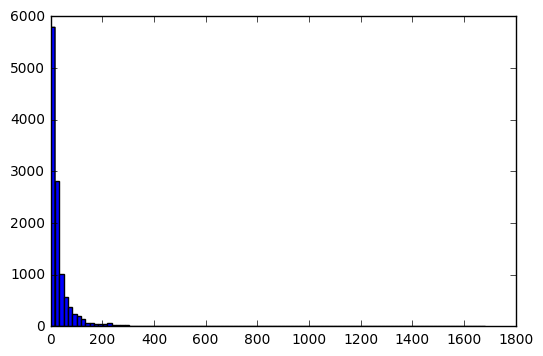

In [78]:
degreeDic = G.degree(weight='weight')
#degreeDic = G.degree()
degreeslist = list(degreeDic.values())
plt.hist(degreeslist,bins=100)
plt.show()

In [79]:
G.size()

31060

In [80]:
import pandas as pd

In [81]:
DF = pd.DataFrame.from_dict(degreeDic,orient='index')
DF.columns = ['Degree']

In [82]:
DF.sort_values(by='Degree', axis=0, ascending=False)

,Degree
Liberté.,1682
Égalité.,1681
Rivalité.,1680
#OITNB,1155
#GraceAndFrankie,1153
🍭,1153
"S2,",1153
"S4,",1152
Ronde,1133
Aix,901


### Thresholding the edges

In [47]:
# Extracting the edge information
#sum_weight = 0
#n_edges = 0
#for u,v,a in G.edges(data=True):
#    sum_weight+=a['weight']
#    n_edges+=1
#average_weight = sum_weight*1.0/n_edges

In [48]:
# Node properties: degree and centrality
degreeDic = G.degree(weight='weight')
nx.set_node_attributes(G,'degree',degreeDic)
bcDic = nx.betweenness_centrality(G)
nx.set_node_attributes(G,'bCentrality',bcDic)

In [49]:
# Write the graph to a json file
from networkx.readwrite import json_graph
datag = json_graph.tree_data(G,root=candidat_id)
import json
s = json.dumps(datag)
#datag['links'] = [
#        {
#            'source': datag['nodes'][link['source']]['id'],
#            'target': datag['nodes'][link['target']]['id']
#        }
#        for link in datag['links']]
s = json.dumps(datag)
with open("viz/treegraph"+series_name+".json", "w") as f:
    f.write(s)

### Open a web page for visualization

In [ ]:
# Open a webserver :
# python3 -m http.server 8008 --bind 127.0.0.1

In [50]:
import webbrowser
url = 'http://localhost:8008/treegraphmarseille.html'
#webbrowser.open_new_tab(url)
webbrowser.open_new(url)

True

In [ ]:
G.edges(data='weight')

In [ ]:
clusterDic